## Monte Carlo Jet Tutorial




## 3. Monte Carlo Simulation Basics
Ramdom numbers evenly distributed

In [2]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import random
import math
x = []
y = []
for i in range(1000):
    x.append(random.random())
    y.append(random.random()*10+5)
numbins = 20
fig, axs = plt.subplots(2, 1)
axs[0].hist(x, numbins, normed=1, facecolor='blue', alpha=0.5)
axs[0].set_title("Random distribution [0, 1]")
axs[1].hist(y, numbins, normed=1, facecolor='blue', alpha=0.5)
axs[1].set_title("Random distribution [5, 15]")
fig.tight_layout(pad=1.0)
plt.show()

<Figure size 640x480 with 2 Axes>

## 3.2 Accept-Reject Method

Random Gaussian with Accept-Reject method

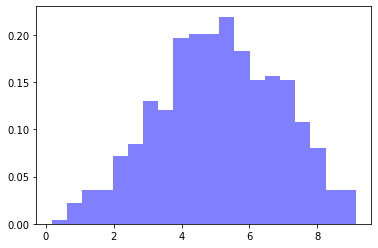

In [39]:
def gaussianCurve(x, m, s):
    return (1/(s*math.sqrt(2*math.pi))) * (math.pow(math.e, (-1/2)*math.pow((x-m)/s, 2)))

def randomAcceptRejectGaussian(minimum, maximum, m, s):
    y_max = gaussianCurve(m, m, s)
    x_val = random.random() * (maximum - minimum) + minimum
    y_cutoff = gaussianCurve(x_val, m, s)
    y_val = random.random() * y_max
    if y_val <= y_cutoff:
        return True, x_val
    else:
        return False, x_val

z = []
for i in range(1000):
    accepted, val = randomAcceptRejectGaussian(0, 10, 5,2)
    if accepted:
        z.append(val)
numbins = 20
plt.hist(z, numbins, normed=1, facecolor='blue', alpha=0.5)
plt.show()

Evalutation of pi with accept-reject

In [56]:
def Pi(n):
    Naccepted = 0
    Ntotal = n
    for i in range (Ntotal):
        x_val = random.random()-0.5
        y_val = random.random()-0.5
        if math.sqrt((math.pow(x_val, 2) + math.pow(y_val, 2))) <= 0.5:
            Naccepted += 1
    pi = 4 * Naccepted / Ntotal
    return pi
Pi(1000)

3.132

Many pi samples to find mean pi and stdv:

In [63]:
for i in range(5):
    piSample = []
    for j in range((i+1)*20):
        piSample.append(Pi(1000))
    stdv = np.std(piSample)
    mean = np.mean(piSample)
    print("Mean pi: " + str(mean)[0:6] + ", Stdv: " + str(stdv)[0:6] + ", Count: " + str((i+1)*20))


Mean pi: 3.1538, Stdv: 0.0506, Count: 20
Mean pi: 3.1418, Stdv: 0.0553, Count: 40
Mean pi: 3.1438, Stdv: 0.0438, Count: 60
Mean pi: 3.1505, Stdv: 0.0475, Count: 80
Mean pi: 3.1383, Stdv: 0.0500, Count: 100


Constant pi samples but more random points in accept-reject method:  

In [67]:
for i in range(4):
    piSample = []
    for j in range(100):
        piSample.append(Pi(int(1000 * math.pow(10, i))))
    stdv = np.std(piSample)
    mean = np.mean(piSample)
    print("Mean pi: " + str(mean)[0:6] + ", Stdv: " + str(stdv)[0:6] + ", Count: 100, Sampling: " + str(1000 * math.pow(10, i)))

Mean pi: 3.1416, Stdv: 0.0517, Count: 100, Sampling: 1000.0
Mean pi: 3.1436, Stdv: 0.0155, Count: 100, Sampling: 10000.0
Mean pi: 3.1420, Stdv: 0.0041, Count: 100, Sampling: 100000.0
Mean pi: 3.1417, Stdv: 0.0015, Count: 100, Sampling: 1000000.0


More samples leads to a better mean but constant standard deviation, more random points in accept-reject method leads to a better approximation of pi with a lower standard deviation

## 3.2 Inverse Transform Method 

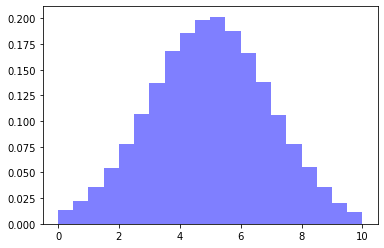

In [19]:
from scipy import special

def invTransformRandom(minimum, maximum, m, s):
    y_min = (1 / 2) * (1 + special.erf(((minimum - m) / (s * math.sqrt(s)))))
    y_max = (1 / 2) * (1 + special.erf(((maximum - m) / (s * math.sqrt(s)))))
    y_val = random.random() * (y_max - y_min) + y_min
    x_val = math.sqrt(2) * s * special.erfinv(2 * y_val - 1) + m
    return x_val

z = []
for i in range(100000):
    z.append(invTransformRandom(0, 10, 5, 2))
numbins = 20
plt.hist(z, numbins, normed=1, facecolor='blue', alpha=0.5)
plt.show()
